In [1]:
#initializing the libraries required to read the data
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()


As we know, provision of loan is an important factor in driving the economy. Sometimes some economists even say "No Loan No Progress". Corporations providing loans earn their profit by charging an appropriate interest rate on the loan amount. One of the biggest risk associated with offering loan is the possibility of defaulting by lenders.  In the context of businesses, given the information of an applicant, we are interested in finding whether the applicant is likely to default. I have decided to investigate each dataset and figure out a model to classify an applicant into categories.  The first part of model building will be an extensive data processing. Next, I will be conducting EDA to figure out features that are pretty discriminatory in classifying. Finally, I will choose a model that better suits the data. Since each loan is associated with a loan status, the loan status will be the target and the other columns will be features, so supervised machine learning algorithm will be better suited.

# Data Processing

In [2]:
#reading the dataset into pandas' dataframe
Loan = pd.read_csv("loan.csv")

In [3]:
#identifying the column names in the Loan Data Frame
Loan.columns

Index(['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF'],
      dtype='object')

# Approved Applications!!!

I am only interested with approved loans since I am intending to predict the quality of a loan based on the behaviour of the loan. Without an approved loan,it is unlikely to study the output of a loan. Hence, I will drop the unsuccessful loan applications. Moreover, unsuccessful loan applications will not payment information. Upon dropping the unsuccessful application, each record in the data will correspond to a successful loan application. 

In [4]:
#considering the approved loans only
Loan = Loan[Loan["approved"] == True]

In [5]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40036 entries, 1 to 577662
Data columns (total 19 columns):
loanId                              40036 non-null object
anon_ssn                            40036 non-null object
payFrequency                        40036 non-null object
apr                                 40036 non-null float64
applicationDate                     40036 non-null object
originated                          40036 non-null bool
originatedDate                      40036 non-null object
nPaidOff                            40015 non-null float64
approved                            40036 non-null bool
isFunded                            40036 non-null int64
loanStatus                          40036 non-null object
loanAmount                          40036 non-null float64
originallyScheduledPaymentAmount    40036 non-null float64
state                               40036 non-null object
leadType                            40036 non-null object
leadCost             

In [6]:
#there are 40036 rows and all the columns except the fpStatus and ClarityFraudID has has 40036 non-null values
Loan.shape[0]

40036

# Are we interested with unprocessed or incomplete applications?
(Anomaly Detection)

In [7]:
#We have discarded unapproved loans previously but it looks they are some approved loans which are not originated.
#this is fishy. 
Loan["originated"].unique()

array([ True, False])

In [8]:
# seems like the originated column has been filled False despite having a valid originatedDate
Loan[(Loan["originated"] == False) & (Loan["approved"] == True)]

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
125718,LL-I-00203828,956d0b7e1c7ba5e21d96fea4929f3eb9,W,570.32,2015-01-31T17:20:48.830000,False,2015-02-02T16:41:14.494000,0.0,True,0,Withdrawn Application,300.0,832.83,OH,bvMandatory,3,NaN,NaN,0
449104,LL-I-00235907,2ff8c6ca9d1fcdbcee4521ba729c7996,W,650.00,2015-02-12T22:58:43.148000,False,2015-02-13T03:14:30.213000,0.0,True,0,Withdrawn Application,300.0,956.28,OH,bvMandatory,3,NaN,NaN,0


In [9]:
#correcting the error by updating the originate values.
Loan.loc[125718, "originated"] = True
Loan.loc[449104, "originated"] = True

In [10]:
#reconfirming
Loan["originated"].unique()

array([ True])

# Analyzing the nPaidOff

In [11]:
#there are 21 loan applications with missing information on number of money lion loans previously paid off
missing_npaid = Loan[Loan["nPaidOff"].isnull()]
Loan[Loan["nPaidOff"].isnull()].shape[0]

21

In [12]:
#to check whether these loan applicants are first time loan applicant
#each of the applicants ssn_hascode occurs exactly once
Loan.loc[Loan["anon_ssn"].isin(list(missing_npaid["anon_ssn"]))]["anon_ssn"].value_counts()

b70bfe750575db54125d7e88c00775ab    1
6860de82ee70ce65b8df8f3cee51dff5    1
8775996c9eb007d33a874648e3857e82    1
30f62193505657d44e10f72fbcc9710e    1
b9489fbc49f70a69ed5af6b43883a017    1
2f5c29c0f73847e753930f695c9dbec0    1
9061f0918a96cdc125322568161aaf1f    1
37b6d5d2c65aa5693d52405046102679    1
2b2951c8841c4737159133b21256e398    1
ffcc526294336c3d952af6de5f82793e    1
f3bcd005f003948c8d731e2d05989063    1
e14f968c746e67840a0bd72dea788dfa    1
2178f3c1a0086b9e5e9d6fd53e91d75a    1
87fa21f4984fa7d5b6aa1b827a9e3fa2    1
da12967bb535b218dc96a8a033bee281    1
dbaf310d394f0dd34f506da08fe16999    1
3e02899b53aa4877f9823b8ed5d5a6f1    1
9e70eecb9c114068d5ef4431a40f7d66    1
52166b67e3d299a8a9239b31a8af9a7b    1
f38cca2f7c480666ed97851a91f959d1    1
cf816b8a04a00ad2d99388b639b5d811    1
Name: anon_ssn, dtype: int64

In [13]:
#some of them are first time applicant as well but they have zero in the npaid column
#first I filtered the data to loans with zero previously paid off loans
zero_npaid = Loan[Loan["nPaidOff"] == 0]
#Next, I checked whether these applicants are first-time loan takers 
#Turns out to be some of the ssn only occurs once
Loan.loc[Loan["anon_ssn"].isin(list(zero_npaid["anon_ssn"]))]["anon_ssn"].value_counts().tail(10)

b2cceabb40a23ccd243398390b633df4    1
a071abda812d1cc7d50cafef2d31fa5c    1
c00d656fa8f6a7cbb88513d5fb480d3d    1
0d3a86c154cdfca8a2fb370df9940f1c    1
bf20cfe347e002325d6e40ed83ede74f    1
2fc79f32aff77ed3aab19d01ca23ef37    1
361bea97be65cc5c6be405292135f5e3    1
d5ddfd2a6a743e6f09e34735a3100044    1
9fae8bdda9b236ef16f22d9142375da4    1
77772b4bc05d35440b0a7cdf3e8fc094    1
Name: anon_ssn, dtype: int64

Hence, I assume the npaid column is actually filled by a human since some of the first time loan applicant have zero in the npaid column whereas some of them are filled with na. So, I am going to replace the missing value with zero.

In [14]:
Loan.loc[(Loan["nPaidOff"].isnull()),"nPaidOff" ] = 0

In [15]:
#as of now, we have are only left two columns with null values
#1."fpStatus"
#2. "clarityFraud ID"
Loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40036 entries, 1 to 577662
Data columns (total 19 columns):
loanId                              40036 non-null object
anon_ssn                            40036 non-null object
payFrequency                        40036 non-null object
apr                                 40036 non-null float64
applicationDate                     40036 non-null object
originated                          40036 non-null bool
originatedDate                      40036 non-null object
nPaidOff                            40036 non-null float64
approved                            40036 non-null bool
isFunded                            40036 non-null int64
loanStatus                          40036 non-null object
loanAmount                          40036 non-null float64
originallyScheduledPaymentAmount    40036 non-null float64
state                               40036 non-null object
leadType                            40036 non-null object
leadCost             

# Studying the loan Status!!!!
the loanstatus columns provides us with the information on the end product of a loan. This is the target column


In [16]:
#studying the type of perfomance for the loan
Loan["loanStatus"].unique()

array(['Paid Off Loan', 'New Loan', 'Internal Collection',
       'External Collection', 'Returned Item', 'Customer Voided New Loan',
       'Credit Return Void', 'Pending Paid Off', 'Charged Off Paid Off',
       'Settled Bankruptcy', 'Settlement Paid Off', 'Charged Off',
       'CSR Voided New Loan', 'Pending Rescind',
       'Customver Voided New Loan', 'Withdrawn Application',
       'Voided New Loan', 'Settlement Pending Paid Off'], dtype=object)

In [17]:
#associated values of each loan status
Loan.groupby("loanStatus").size()

loanStatus
CSR Voided New Loan                8
Charged Off                        1
Charged Off Paid Off             159
Credit Return Void               701
Customer Voided New Loan         334
Customver Voided New Loan          1
External Collection            11334
Internal Collection             5564
New Loan                        8112
Paid Off Loan                  11427
Pending Paid Off                 169
Pending Rescind                    4
Returned Item                   1182
Settled Bankruptcy               325
Settlement Paid Off              708
Settlement Pending Paid Off        1
Voided New Loan                    2
Withdrawn Application              4
dtype: int64

An application is withdrawn due to three reasons. Either the application has been abandoned for more than 2 weeks or an underwriter manually terminated the application or withdrawn by the applicant itself. Do this group of individual provide any insight in classifying whether a loan is risky or not. Based on my inferential thinking, we don't need any information regarding withdrawn application to analyze how risky a loan is. Withdrawn applications don't contribute to studying the perfomance of a loan. However, before eliminating any of the Loan Status, I want to investigate whether these loans are actually a withdrawn application. I am having this doubt because the LoanStatus column seems like human-entered column due the presence of spelling mistake-- "Customver Voided New Loan". To analyze that, I am going to left-join data with the payment data to see whether the withdrawn applications and voided applications have associated payment status.



In [18]:
#reading the payment.csv into dataframe
payment = pd.read_csv("payment.csv")

In [19]:
#merging the loan and payment data frame using the loan id as the primary key
Loans_with_payment = pd.merge(Loan,payment, right_on = "loanId", left_on = "loanId", how = "inner")

In [20]:
#every loan status has associated payment rows
Loans_with_payment["loanStatus"].unique()

array(['Paid Off Loan', 'New Loan', 'Internal Collection',
       'External Collection', 'Returned Item', 'Customer Voided New Loan',
       'Credit Return Void', 'Pending Paid Off', 'Charged Off Paid Off',
       'Settled Bankruptcy', 'Settlement Paid Off', 'Charged Off',
       'CSR Voided New Loan', 'Pending Rescind',
       'Customver Voided New Loan', 'Withdrawn Application',
       'Voided New Loan', 'Settlement Pending Paid Off'], dtype=object)

In [21]:
#checking the payment status of withdrawn applications
Loans_with_payment[Loans_with_payment["loanStatus"] == "Withdrawn Application"]["paymentStatus"].unique()

array(['Cancelled'], dtype=object)

In [22]:
#Since every loan status has associated payment info, I have decided to investigate the payment status to figure out
# whether I can exclude any of the loan status
removal_list = ["Voided New Loan","CSR Voided New Loan", "Customer Voided New Loan","Customver Voided New Loan",
                "Credit Return Void", "Withdrawn Application"]
for i in removal_list:
    Payment_status = Loans_with_payment[Loans_with_payment["loanStatus"] == i]["paymentStatus"].unique()
    print(i, Payment_status)

Voided New Loan ['Cancelled' 'Checked']
CSR Voided New Loan ['Checked' 'Skipped' 'Cancelled' 'Rejected' 'None']
Customer Voided New Loan ['Checked' 'Cancelled' 'None' 'Pending' 'Rejected' 'Skipped']
Customver Voided New Loan ['Checked' 'Cancelled']
Credit Return Void ['Cancelled' 'None' 'Checked' 'Rejected' 'Skipped' 'Pending']
Withdrawn Application ['Cancelled']


Based on the previous analysis, I am certainly sure that withdrawn application should be removed but some of the the loan status studied above has associated payment status. This is doubful. Let's investigate whether these loans are funded ultimately.

In [23]:
#studying whether these loans are ultimately funded
for i in removal_list:
    funded = Loans_with_payment[Loans_with_payment["loanStatus"] == i]["isFunded"].unique()
    print(i, funded)

Voided New Loan [0]
CSR Voided New Loan [0]
Customer Voided New Loan [0]
Customver Voided New Loan [0]
Credit Return Void [0]
Withdrawn Application [0]


It is clear none of the loans associated with these loan status is funded. Hence, I have decided drop all the rows with the associated loan status.(This seems to be a anomaly)

In [24]:
#removing the rows with the associated status
for i in removal_list:
       Loans_with_payment = Loans_with_payment[~(Loans_with_payment["loanStatus"] == i)]

In [25]:
#New loans are still in early stage to be studied about its perfomance
#So these loans dont provide much analysis regarding studying the pattern
Loans_with_payment = Loans_with_payment[~(Loans_with_payment["loanStatus"] == "New Loan")]

In [26]:
#It is not rational to classify loans with one returned paymnet as risky loans.
#In the business world, it is important to have some graceperiod to retain customers.
#These loans do not discriminate effectively. 
#so, I have decided to drop them out of the model
Loans_with_payment = Loans_with_payment[~(Loans_with_payment["loanStatus"] == "Returned Item")]

In [27]:
#Pending Paid off and Pending rescind
#these are details associated with current status of a loan
#again, it is important to have generalized model
#taking into account of these kind of specifics will result in an overfittting model
#these loan status are time specific detail of a loan instead of being a end product of a loan
Loans_with_payment = Loans_with_payment[~(Loans_with_payment["loanStatus"] == "Pending Rescind")]
Loans_with_payment = Loans_with_payment[~(Loans_with_payment["loanStatus"] == "Pending Paid Off")]

In [28]:
Loans_with_payment["loanStatus"].value_counts()

External Collection            217246
Paid Off Loan                  188838
Internal Collection             94082
Settlement Paid Off             14125
Settled Bankruptcy               5539
Charged Off Paid Off             2526
Charged Off                        13
Settlement Pending Paid Off        13
Name: loanStatus, dtype: int64

in order to study the discriminating features between a risky loan and a good loan, I need highly discrimating loan status. I definitely need the fully paid off loan as the good loans. Next, I need to pick the most risky loans. Based on the values, I am definitely picking "Settlement Paid Off", "Charged Off Paid Off", "Settled Bankruptcy", "Settlement Pending Paid off" since these loans are clearly bad loans. 

# External Collection and Internal Collection

The loans falling in these two categories are not entirely bad. These type of loans serve as the midpath between the most risky loans and good loans. I didnt want to exclude the loans from the analysis since there are considerable of data on these loans.
Internal collections are loans where the customer fails to pay the payment amount within the time period, so these loans will be transferred to the internal 

**Internal collections** are loans where the customer fails to pay the payment amount within the time period, so these loans will be transferred to the internal collection department.

**External collections** are the loans where the internal collection department fails to collect the payment and becomes a serious debt. Hence these loans are passed to third party for payment collection

There is a general ordering between these loans.    
**GOOD LOAN --> RISKY LEVEL 1(INTERNAL) --> RISKY LEVEL 2(EXTERNAL) --> BAD LOANS**

In [29]:
#so three catefories
#1. Good Loan
#2. Bad Loan
#3. Risky level 1-- Internal Collection
#4. Risky Level 2--External Collection
Loans_with_payment.loc[(Loans_with_payment["loanStatus"] == "Paid Off Loan"), "loanStatus"] = "Good Loan"
Loans_with_payment.loc[(Loans_with_payment["loanStatus"].isin(["External Collection"])), "loanStatus"] = "Risky level 2"
Loans_with_payment.loc[(Loans_with_payment["loanStatus"].isin(["Internal Collection"])), "loanStatus"] = "Risky level 1"
Loans_with_payment.loc[~(Loans_with_payment["loanStatus"].isin(["Good Loan", "Risky level 1", "Risky level 2"])), "loanStatus"] = "Bad Loan"


In [30]:
Loans_with_payment["loanStatus"].value_counts()

Risky level 2    217246
Good Loan        188838
Risky level 1     94082
Bad Loan          22216
Name: loanStatus, dtype: int64

As of now, we have well-defined label column.

# Removing the columns with only type of value--Called single value columns

In [31]:
#Removing single valued columns
for i in list(Loans_with_payment.columns):
    if Loans_with_payment.loc[:, i].nunique() < 2:
        Loans_with_payment.drop(i, axis = 1, inplace = True)


# Removing Redundant Columns

In [32]:
#The ssn column and npaidOff columns convey almost similar thing
#zero means either they are new customers or still paying multiple loans
#any other number shows there are previous customers
#moreover, ssn is just a hash value to identify a customer
Loans_with_payment.drop("anon_ssn", axis = 1, inplace = True)

In [33]:
# we are not interested with the originated date and whether the loan is originated,
#Because we know these loans have been approved
#in the same context application date is redundant
Loans_with_payment.drop(["originatedDate"], axis = 1, inplace = True)
Loans_with_payment.drop("applicationDate", axis = 1, inplace = True)

In [34]:
# again Paymnet Returncode is not available for all everyone. More than 40% of the data as no associated Payment Return Code
# Payment Return code is too specific to analyze the behavior of a loan taker
#some of the payment returncode such as account closed are a serious alarm to be a bad loan
# payment date is redundant since it is just a time variable
Loans_with_payment.drop("paymentReturnCode", axis = 1, inplace = True)
Loans_with_payment.drop("paymentDate", axis = 1, inplace = True)

In [35]:
#leadcost is the cost associated with lead. 
#It says something about the lead but they are redundant in analyzing whether someone is likely to default
#taking into account of Lead type is sufficient to study the behaviour of a loan
Loans_with_payment.drop("leadCost", axis = 1, inplace = True)

In [36]:
#the first payment status is also represented in paymentstatus column of the payment data.
#This is redundant
Loans_with_payment.drop("fpStatus", axis = 1, inplace = True)

In [37]:
Loans_with_payment["paymentStatus"].unique()

array(['Checked', 'Cancelled', 'Pending', 'None', 'Rejected', 'Skipped',
       'Rejected Awaiting Retry', 'Returned', 'Complete'], dtype=object)

In [38]:
Loans_with_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522382 entries, 0 to 689094
Data columns (total 17 columns):
loanId                              522382 non-null object
payFrequency                        522382 non-null object
apr                                 522382 non-null float64
nPaidOff                            522382 non-null float64
loanStatus                          522382 non-null object
loanAmount                          522382 non-null float64
originallyScheduledPaymentAmount    522382 non-null float64
state                               522382 non-null object
leadType                            522382 non-null object
clarityFraudId                      433255 non-null object
hasCF                               522382 non-null int64
installmentIndex                    522382 non-null int64
isCollection                        522382 non-null bool
principal                           522382 non-null float64
fees                                522382 non-null float64
pa

In [39]:
#the payment amount is usually the sum of principal and fees. 
#The customers are paying mentioned payment amount(the aggregated value)
#so, studying the principal and fees seems to be pretty redundant
Loans_with_payment.drop("principal", axis = 1, inplace = True)
Loans_with_payment.drop("fees", axis = 1, inplace = True)

In [40]:
#the loan and paymentt data consist of details on each installment for a loan id. 
#I have decided to aggregate the data based on loan id


#percentage of unsuccessful intallments relative to the loan amount
def n_reject(series):
    return sum(series.isin(["Rejected", "Cancelled", "Skipped", "Rejected awaiting retry"]) )/ len(series)

#some loans will have multiple intallement index of similar number due to collection systems
#to generalize for each loan, I have decided to take the total number of installment
def n_installment(series):
    return len(series)

#taking the averages of payment amount
#most of the payment amount are pretty consistent
#to avoid outlier's influence, median will be a better measure of payment amount for the entire installment period
def n_median(series):
    return np.median(series)


In [41]:
Loans_with_payment.columns

Index(['loanId', 'payFrequency', 'apr', 'nPaidOff', 'loanStatus', 'loanAmount',
       'originallyScheduledPaymentAmount', 'state', 'leadType',
       'clarityFraudId', 'hasCF', 'installmentIndex', 'isCollection',
       'paymentAmount', 'paymentStatus'],
      dtype='object')

In [42]:
#aggregated the data based on the functions defined
agg_dict = {"payFrequency":'first', "apr":"first", "nPaidOff":"first", "loanStatus": "first","loanAmount": "first","originallyScheduledPaymentAmount":"first", "state":"first", "leadType":"first", 'clarityFraudId': "first", 'hasCF':"first", 'installmentIndex':n_installment, 'isCollection' :"first", 'paymentAmount':n_median, 'paymentStatus':n_reject}
Aggregated_LP = Loans_with_payment.groupby("loanId").agg(agg_dict)

In [43]:
Aggregated_LP.reset_index(inplace = True)

# Considering the clarity Fraud score !!!

In [94]:
#reading the clarity_underwriting_variables.csv into dataframe
clarity = pd.read_csv("clarity_underwriting_variables.csv")

In [46]:
#left join since not all the applicants have a clarityFRaudScore
clarity_needed = clarity.loc[:, ["clearfraudscore","underwritingid"]]
Final_dataSet = pd.merge(Aggregated_LP, clarity_needed, left_on = "clarityFraudId", right_on = "underwritingid", how = "left")

In [47]:
#clarity fraud score is an important feature regarding an applicant
#moreover, almost 90% of the applicants have a fraudscore
#so i decided to replace the missing values with median of the score instead of mean -- mean is affected by outliers
#median is decided based on the loan status
median_risky_1 = np.median(Final_dataSet[~Final_dataSet["clearfraudscore"].isnull() & (Final_dataSet["loanStatus"] == "Risky level 1")]["clearfraudscore"])
median_risky_2 = np.median(Final_dataSet[~Final_dataSet["clearfraudscore"].isnull() & (Final_dataSet["loanStatus"] == "Risky level 2")]["clearfraudscore"])
median_bad = np.median(Final_dataSet[~Final_dataSet["clearfraudscore"].isnull() & (Final_dataSet["loanStatus"] == "Bad Loan")]["clearfraudscore"])
median_good = np.median(Final_dataSet[~Final_dataSet["clearfraudscore"].isnull() & (Final_dataSet["loanStatus"] == "Good Loan")]["clearfraudscore"])


Final_dataSet.loc[(Final_dataSet["clearfraudscore"].isnull()) &(Final_dataSet["loanStatus"] == "Risky level 1") , "clearfraudscore"] = median_risky_1
Final_dataSet.loc[(Final_dataSet["clearfraudscore"].isnull()) &(Final_dataSet["loanStatus"] == "Risky level 2") , "clearfraudscore"] = median_risky_2
Final_dataSet.loc[(Final_dataSet["clearfraudscore"].isnull()) &(Final_dataSet["loanStatus"] == "Bad Loan") , "clearfraudscore"] = median_bad
Final_dataSet.loc[(Final_dataSet["clearfraudscore"].isnull()) &(Final_dataSet["loanStatus"] == "Good Loan") , "clearfraudscore"] = median_good

In [48]:
#dropping the columns that are not necessary anymore
#the id's are just a unique value to find a customer
# has CF just gives information 
Final_dataSet.drop(["clarityFraudId", "hasCF","underwritingid"], axis = 1, inplace = True)

In [49]:
#Removing single valued columns upon obtaining the Final_DataSet
for i in list(Final_dataSet.columns):
    if Final_dataSet.loc[:, i].nunique() < 2:
        Final_dataSet.drop(i, axis = 1, inplace = True)
   

In [50]:
Final_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29505 entries, 0 to 29504
Data columns (total 13 columns):
loanId                              29505 non-null object
payFrequency                        29505 non-null object
apr                                 29505 non-null float64
nPaidOff                            29505 non-null float64
loanStatus                          29505 non-null object
loanAmount                          29505 non-null float64
originallyScheduledPaymentAmount    29505 non-null float64
state                               29505 non-null object
leadType                            29505 non-null object
installmentIndex                    29505 non-null int64
paymentAmount                       29505 non-null float64
paymentStatus                       29505 non-null float64
clearfraudscore                     29505 non-null float64
dtypes: float64(7), int64(1), object(5)
memory usage: 3.2+ MB


# Exploratory Data Analysis

## Analyzing the Categorical Columns

/srv/app/venv/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


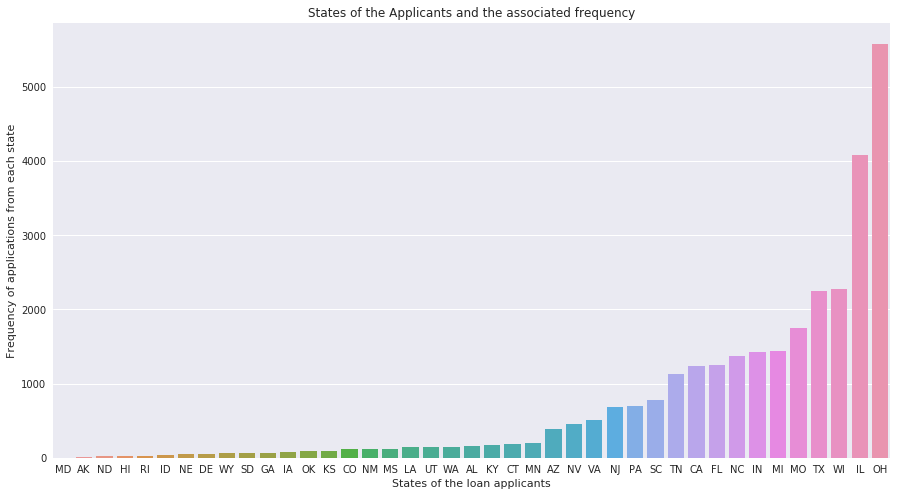

In [51]:
#To plot the states and the associated frequency to identify the scope of the data.
# large number of applicants are dominantly from OH.
# The data contains information of applicants from 41 states out of 55 states in US.
# some of the states contain less than 5 application. Hence, this data doesn't represent entire united states

Locations_frequency = Final_dataSet.groupby("state").size()
plt.figure(figsize=(15,8))
sns.countplot(data = Final_dataSet, x = "state",order = Locations_frequency.sort_values(ascending = True).index )
plt.xlabel("States of the loan applicants")
plt.ylabel("Frequency of applications from each state")
plt.title("States of the Applicants and the associated frequency");

Most of the records are from Ohio. States like MD, AK, ND have very few approved loans

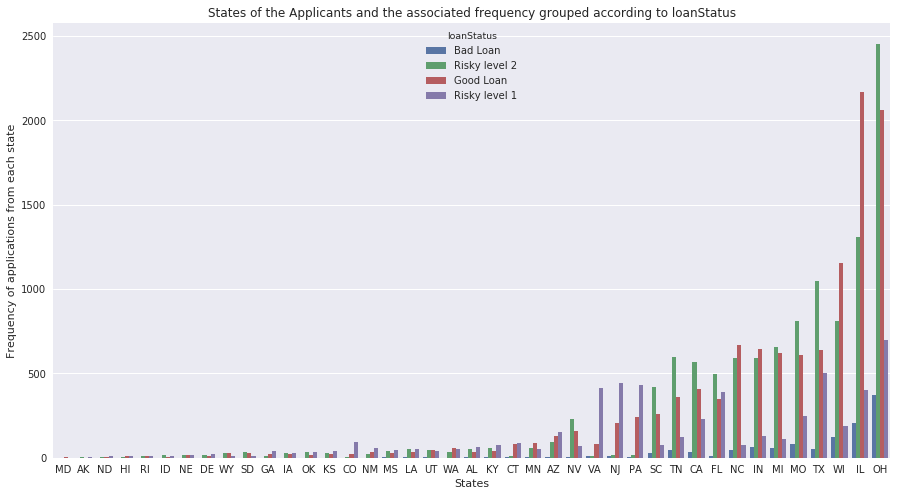

In [54]:
#classifying the state based on loan status
plt.figure(figsize=(15,8))
sns.countplot(data = Final_dataSet, x = "state",order = Locations_frequency.sort_values(ascending = True).index , hue = "loanStatus")
plt.xlabel("States")
plt.ylabel("Frequency of applications from each state")
plt.title("States of the Applicants and the associated frequency grouped according to loanStatus");


Almost all the states have more pretty risky loan compared to other type of loans in relative terms. only some of the states have more good loans than the other loans. Every state has frequency of bad loan lower than the other type of loan. Since some of the states have more good loans than risky loans, this feature is pretty discrimanatory in building the model.

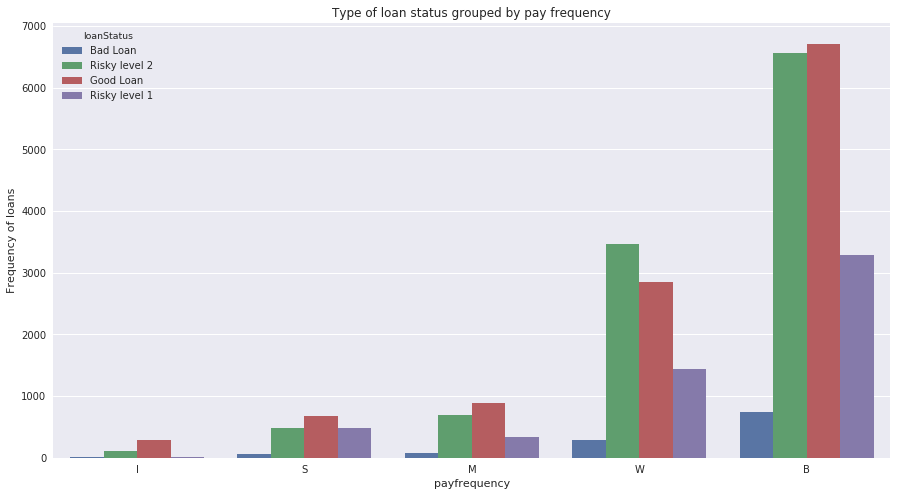

In [55]:
Locations_frequency2 = Final_dataSet.groupby("payFrequency").size()
plt.figure(figsize=(15,8))
sns.countplot(data = Final_dataSet, x = "payFrequency",order = Locations_frequency2.sort_values(ascending = True).index , hue = "loanStatus")
plt.xlabel("payfrequency")
plt.ylabel("Frequency of loans")
plt.title("Type of loan status grouped by pay frequency");

Every paymnet scheme follows similar trend except weekly payment scheme.  So, droppping this feature is not entirely justifiable. So, I have decided to include this feature and improve the model later in the part.

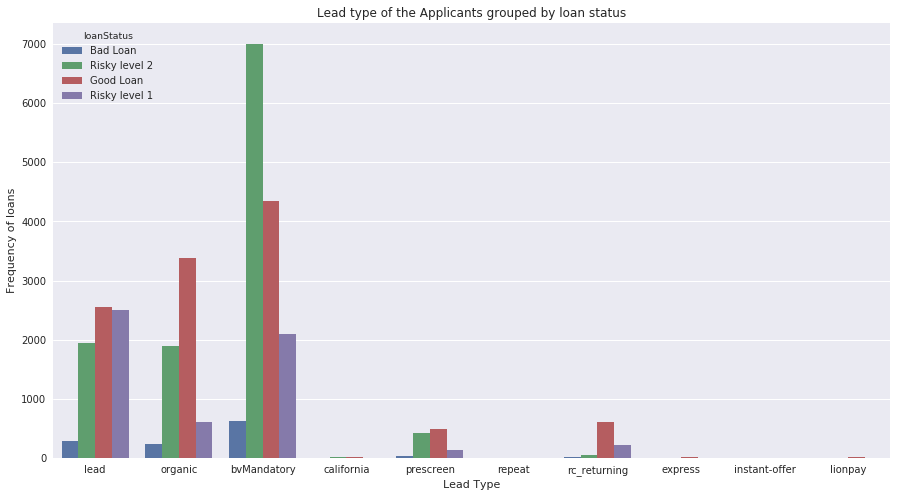

In [56]:
#Analysing the leadtype for each loan status
plt.figure(figsize=(15,8))
sns.countplot(data = Final_dataSet, x = "leadType", hue = "loanStatus") 
plt.xlabel("Lead Type")
plt.ylabel("Frequency of loans")
plt.title("Lead type of the Applicants grouped by loan status");

By Mandatory has more risky level 2 loan compared to other type of loans. There is variability in the loan status according to each leadtype. This is pretty discrimatory variable to select.

## Analyzing the Numerical columns

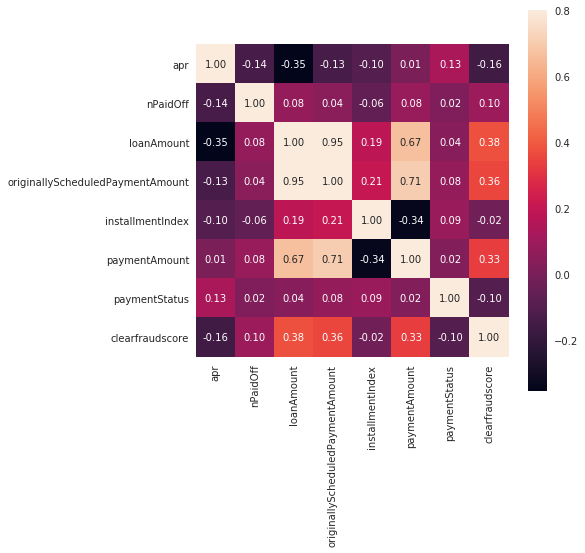

In [57]:
#Heatmap is useful in finding whether any of the variables are pretty similar(Highly correlated)
#when deciding correlation it is very important to notice whether this is a valid association
corrmat = Final_dataSet.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f')
plt.show()

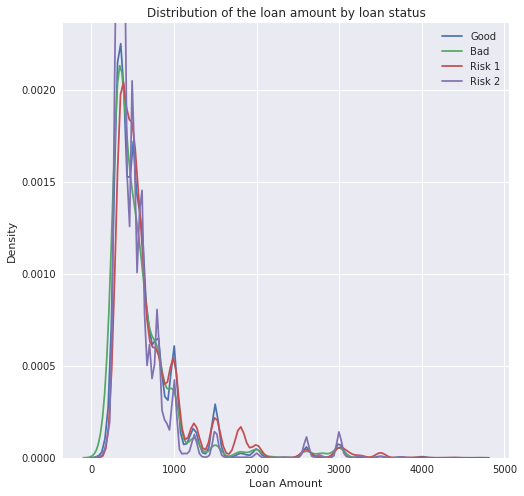

In [58]:
#studying the distribution of Loan amount
# the loanamount doesn't really provide better discrimination between the different type of loans
#all the different status of the loan has similar peaks and similar spread
plt.figure(figsize=(8,8))
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Good Loan"]["loanAmount"], hist = False, label = "Good")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Bad Loan"]["loanAmount"], hist = False, label = "Bad")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Risky level 1"]["loanAmount"], hist = False, label = "Risk 1")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Risky level 2"]["loanAmount"], hist = False, label = "Risk 2")
plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.title("Distribution of the loan amount by loan status")
plt.show();

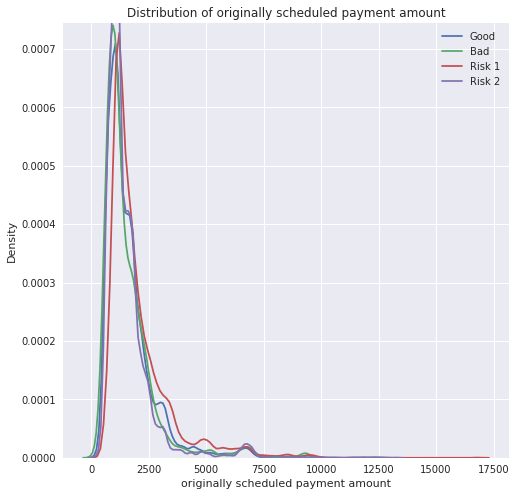

In [59]:
#studying the distribution of originally  scheduled amount
#the originally scheduled doesn't really provide better discrimination between the different type of loans
#all the different status of the loan has similar peaks and almost similar spread
plt.figure(figsize=(8,8))
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Good Loan"]["originallyScheduledPaymentAmount"], hist = False, label = "Good")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Bad Loan"]["originallyScheduledPaymentAmount"], hist = False, label = "Bad")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Risky level 1"]["originallyScheduledPaymentAmount"], hist = False, label = "Risk 1")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Risky level 2"]["originallyScheduledPaymentAmount"], hist = False, label = "Risk 2")
plt.xlabel("originally scheduled payment amount")
plt.ylabel("Density")
plt.title("Distribution of originally scheduled payment amount")
plt.show();

Based on the Heatmap analysis, the features such as "loanamount" and "originally scheduled payment amount is highly correlated to the extent of 0.95.And then, we know the initial payment amount depends on the loan amount. Next, we also found out that the loan amount is actually doesn't show distinction between the different loan status. hence, I it is reasonable to drop both the columns. 

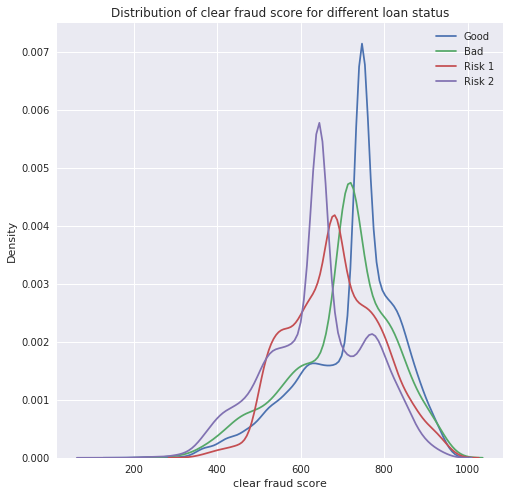

In [60]:
#the clearfraud score has clear peaks for each type of loan status
#this is pretty good discrimanatory variable
plt.figure(figsize=(8,8))
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Good Loan"]["clearfraudscore"], hist = False, label = "Good")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Bad Loan"]["clearfraudscore"], hist = False, label = "Bad")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Risky level 1"]["clearfraudscore"], hist = False, label = "Risk 1")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Risky level 2"]["clearfraudscore"], hist = False, label = "Risk 2")
plt.xlabel("clear fraud score")
plt.ylabel("Density")
plt.title("Distribution of clear fraud score for different loan status")
plt.show();

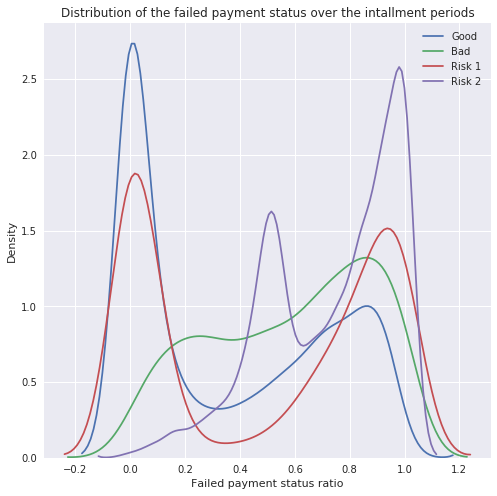

In [61]:
#the paymentstatus ratio doesn't provide us with clear distinction between all the loans
#But it does provide a good discrimination between the good and bad loan
#so I decided to use this to train the model
plt.figure(figsize=(8,8))
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Good Loan"]["paymentStatus"], hist = False, label = "Good")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Bad Loan"]["paymentStatus"], hist = False, label = "Bad")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Risky level 1"]["paymentStatus"], hist = False, label = "Risk 1")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Risky level 2"]["paymentStatus"], hist = False, label = "Risk 2")
plt.xlabel("Failed payment status ratio")
plt.ylabel("Density")
plt.title("Distribution of the failed payment status over the intallment periods")
plt.show();

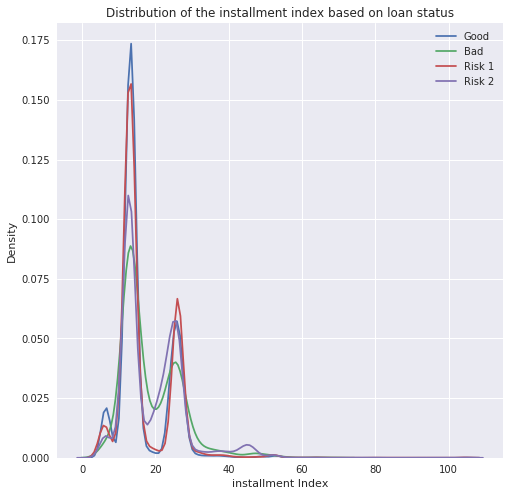

In [62]:
#the installment index shows a similar distribution for all the types of loan status
#each type of loanstatus has similar peaks and troughs 
#so this is not a very discrimanatory feature to select
plt.figure(figsize=(8,8))
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Good Loan"]["installmentIndex"], hist = False, label = "Good")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Bad Loan"]["installmentIndex"], hist = False, label = "Bad")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Risky level 1"]["installmentIndex"], hist = False, label = "Risk 1")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Risky level 2"]["installmentIndex"], hist = False, label = "Risk 2")
plt.xlabel("installment Index")
plt.ylabel("Density")
plt.title("Distribution of the installment index based on loan status")
plt.show();

The distribution of each variable follow similar distribution. They have similar peaks and troughs. There is no variations between different loan status. So, it is reasonable to drop this feature.

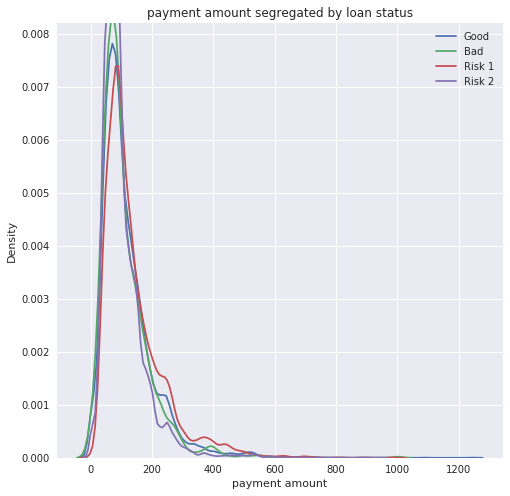

In [63]:
#the average payment amount shows a similar distribution for all the types of loan status
#each type of loanstatus has similar peaks and troughs 
#so this is not a very discrimanatory feature. 
#reasonable to drop this feature
plt.figure(figsize=(8,8))
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Good Loan"]["paymentAmount"], hist = False, label = "Good")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Bad Loan"]["paymentAmount"], hist = False, label = "Bad")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Risky level 1"]["paymentAmount"], hist = False, label = "Risk 1")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Risky level 2"]["paymentAmount"], hist = False, label = "Risk 2")
plt.xlabel("payment amount")
plt.ylabel("Density")
plt.title("payment amount segregated by loan status")
plt.show();

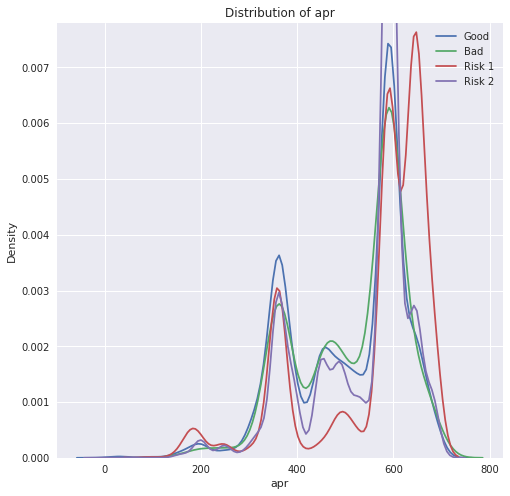

In [64]:
#the apr ditribution of each loan status follows similar distribution except the distribution of risk 1 loan. 
#the risk1 loan has slight variations compared to the other
#it is not significant but droppin it is not entirely justifiable. 
#So, I have decided to keep it and improve the model later.
plt.figure(figsize=(8,8))
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Good Loan"]["apr"], hist = False, label = "Good")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Bad Loan"]["apr"], hist = False, label = "Bad")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Risky level 1"]["apr"], hist = False, label = "Risk 1")
sns.distplot(Final_dataSet[Final_dataSet["loanStatus"] == "Risky level 2"]["apr"], hist = False, label = "Risk 2")
plt.xlabel("apr")
plt.ylabel("Density")
plt.title("Distribution of apr")
plt.show();

In [65]:
Final_dataSet.columns


Index(['loanId', 'payFrequency', 'apr', 'nPaidOff', 'loanStatus', 'loanAmount',
       'originallyScheduledPaymentAmount', 'state', 'leadType',
       'installmentIndex', 'paymentAmount', 'paymentStatus',
       'clearfraudscore'],
      dtype='object')

In [66]:
#dropping the redundant columns upon completing the exploratory data analysis
#also dropped loanId since it is no longer needed and has no relevance to the perfomance of a loan
Columns_to_drop = ["loanId", "loanAmount", "originallyScheduledPaymentAmount", "paymentAmount", "installmentIndex"]
for i in Columns_to_drop:
    Final_dataSet.drop(i, axis =1, inplace = True)

In [67]:
Final_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29505 entries, 0 to 29504
Data columns (total 8 columns):
payFrequency       29505 non-null object
apr                29505 non-null float64
nPaidOff           29505 non-null float64
loanStatus         29505 non-null object
state              29505 non-null object
leadType           29505 non-null object
paymentStatus      29505 non-null float64
clearfraudscore    29505 non-null float64
dtypes: float64(4), object(4)
memory usage: 3.3+ MB


# Building the Model

## What we have accomplished so far?

we have figured 4 distinctive categories of loan status. We have the features and also the associated labels. Upon conducting the EDA, we have dropped the features that are not discriminatory. 

In [68]:
# we have pretty imbalanced data
#the quantity of bad loan is pretty small relative to the entire data.
Final_dataSet["loanStatus"].value_counts()

Good Loan        11425
Risky level 2    11334
Risky level 1     5552
Bad Loan          1194
Name: loanStatus, dtype: int64

# Which ML model to choose?
The dataset is pretty imbalanced. We need a model that  handles imbalanced data. The random forest classifier in scikit-Learn has a parameter called weigh_balance maintains the classification by considering the proportion of categories. Moreover, Random forest does not suffer overfitting problem. We have four categories to classify, so I need a ml algorithm that handles multiple categories and imbalanced data. The logistic regression method is not well-suited for imbalanced data. So, I decided to try the random forest classifier. Random forests is considered a highly accurate and robust method because of the number of decision trees participating in the process.

# RandomForest Classifier

In [69]:
#we need numbers to enter the labels into the model
#so I decided to give a number code for the various categories
# Bad Loan == 4
# Risky level 2 == 3
# Risky Level 1 == 2
# Good Loan == 1
def label_encoder(string):
    if string == "Bad Loan":
        return 4
    elif string == "Risky level 2":
        return 3
    elif string == "Risky level 1":
        return 2
    else:
        return 1
    

In [70]:
#encoding the target column
dummy = Final_dataSet.copy()
dummy["loanStatus"] = dummy["loanStatus"].apply(label_encoder)
#selecting the feature column
feature = dummy["loanStatus"]
#selecting the feature columns
dummy = dummy[["payFrequency", "apr", "state", "leadType", "paymentStatus", "clearfraudscore", "nPaidOff"]]

In [71]:
# the categorical variables in this data doesn't impose any ordering
#so I have decided to use one hot encoding
dummy = pd.get_dummies(dummy)

In [72]:
feature.unique()

array([4, 3, 1, 2])

In [73]:
#importing the train_test_split module
#dedicating 80% of the data train the model and 20% to test the model
from sklearn.model_selection import train_test_split

X = dummy
y = feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [91]:
#Importing the Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Created a Gaussian Classifier
#decided to produce 5 decision trees
clf=RandomForestClassifier(n_estimators=5, class_weight = "balanced")

#Training the model 
clf.fit(X_train,y_train)

#predicting using the model and the test set
y_pred=clf.predict(X_test)

In [92]:
# metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6844602609727165


In [87]:
#hyperparamater tuning - 10 decision tree
clf=RandomForestClassifier(n_estimators=10, class_weight = "balanced")

#Training the model 
clf.fit(X_train,y_train)

#predicting using the model and the test set
y_pred=clf.predict(X_test)

In [88]:
#the new accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7042874089137434


# Conclusion

Even though the model has a 70% accuracy rate,some of the features we used are not predetermined information of an applicant. For an instance, we don't have any information on payment status when someone applies for a loan. Even with the features we used, the EDA showed some of them show very little variations between the different loan status. In order to have better model, I need more data on the applicants especially,the credit score, occupation and monthly income.

**I spent almost 4 days to clean and investigate the dataset and few hours to build the model**